In [2]:
#Paqueterías a usar

import os 
import glob
import re 

import numpy as np
import pandas as pd

import random
import warnings

import seaborn as sns
import matplotlib.pyplot as plt 
import plotly.offline as pyo
import plotly.express as px
import plotly.graph_objects as go

warnings.filterwarnings('ignore')
pd.set_option('display.float_format', lambda x: '%.f' % x)

os.chdir('/home/carlos/Documentos/3_Adsocial/Marketing/Analytics/librerias')
os.listdir()
#librería creada con funciones para facilitar la lectura del cuaderno jupyter.
import analytics_funciones

In [30]:
#Union archivos Office Depot
audiencia_afinidad = analytics_funciones.Union_Archivos(Cuenta = ['Office Depot'], analysis = 'categorias_afinidad', nivel = 'Audiencia')

#Fechas
audiencia_afinidad['fechas'] = [ re.findall( r"\d{8}-\d{8}" ,i) for i in audiencia_afinidad.archivo ]
audiencia_afinidad = analytics_funciones.Formato_Fechas_Analytics(audiencia_afinidad, 'fechas')
audiencia_afinidad['mes'] = pd.DatetimeIndex(audiencia_afinidad['Fecha_inicio']).month.map(str)
audiencia_afinidad = audiencia_afinidad[audiencia_afinidad.Fecha_inicio > '2018-12-01T00:00:00.000000000'] #solo 2019

#Formato categorias
audiencia_afinidad['Categoría de afinidad (cobertura)'] = audiencia_afinidad.loc[:,'Categoría de afinidad (cobertura)'].str.lower()
tmp = audiencia_afinidad['Categoría de afinidad (cobertura)'].str.split("/", 20, expand=True).iloc[:,:2]
audiencia_afinidad['categoria'] = tmp.iloc[:,0]
audiencia_afinidad['subcategoria'] = tmp.iloc[:,1]

### Office Depot

## Analisis del Producto 

Contamos con información 2019.

Buscamos conocer mejor la audiencia que ingresa al sitio de Office Depot, con el objetivo de entender:
    
    ¿Cuales son las principales categorías?
    ¿Cuales son las subcategorias por categoría?
    
    ¿Qué categoría genera mayores Ingresos?
    
    ¿Qué fuentes de Medios tengo dentro de las categorias más importantes?



In [31]:
audiencia_afinidad.head()

,Categoría de afinidad (cobertura),Duración media de la sesión,Fuente/Medio,Ingresos,Porcentaje de rebote,Páginas/sesión,Sesiones,Tasa de conversión de comercio electrónico,Transacciones,Usuarios,Usuarios nuevos,archivo,cuenta,fechas,Fecha_inicio,Fecha_fin,mes,categoria,subcategoria
0,news & politics/avid news readers,279,google / cpc,26838280,0,10,472635,0,5924,285993,191407,/home/carlos/Dropbox/Históricos GG/Históricos ...,Office Depot,[20190501-20190531],2019-05-01,2019-05-31,5,news & politics,avid news readers
1,shoppers/value shoppers,284,google / cpc,26063070,0,10,457417,0,6030,271956,177035,/home/carlos/Dropbox/Históricos GG/Históricos ...,Office Depot,[20190501-20190531],2019-05-01,2019-05-31,5,shoppers,value shoppers
2,food & dining/cooking enthusiasts/30 minute chefs,280,google / cpc,18926258,0,10,398757,0,4580,246256,166638,/home/carlos/Dropbox/Históricos GG/Históricos ...,Office Depot,[20190501-20190531],2019-05-01,2019-05-31,5,food & dining,cooking enthusiasts
3,lifestyles & hobbies/business professionals,317,google / cpc,25217850,0,11,372224,0,5575,218180,136472,/home/carlos/Dropbox/Históricos GG/Históricos ...,Office Depot,[20190501-20190531],2019-05-01,2019-05-31,5,lifestyles & hobbies,business professionals
4,news & politics/avid news readers,287,google / organic,11693803,0,9,294790,0,3079,204577,130399,/home/carlos/Dropbox/Históricos GG/Históricos ...,Office Depot,[20190501-20190531],2019-05-01,2019-05-31,5,news & politics,avid news readers


**¿Cuales son las principales categorias?**

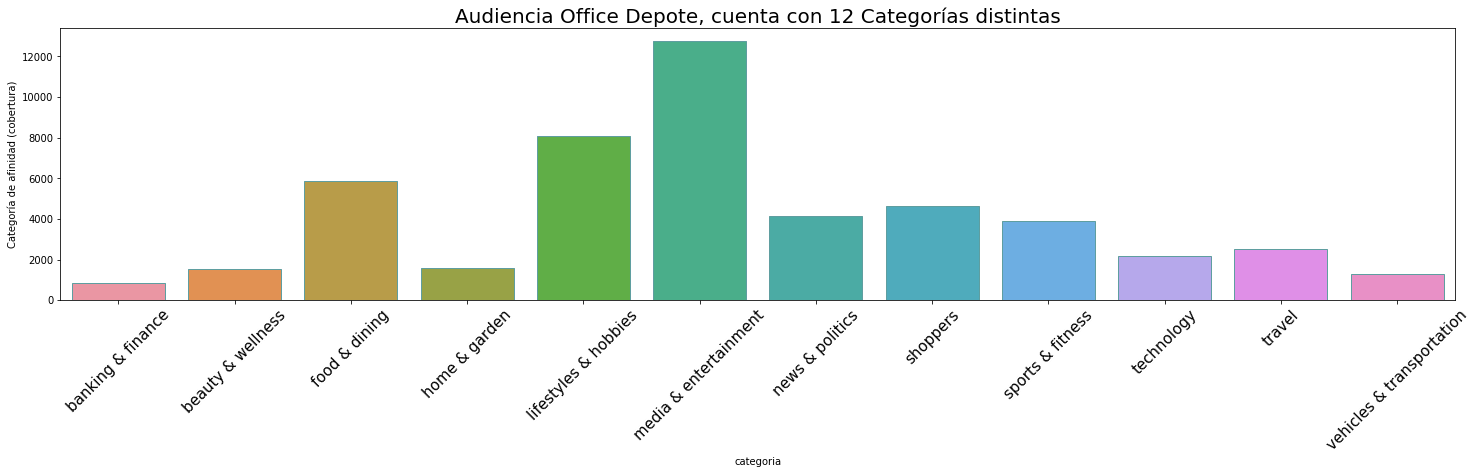

In [9]:
plt.rcParams['figure.figsize'] = [25, 5]

tmp = analytics_audiencia.groupby(['categoria'],as_index = False).count().iloc[:,[0,1]]

sns.barplot(y = tmp.iloc[:,1], x = tmp.iloc[:,0], 
            estimator = np.mean,
            ci = False,
            data = tmp,
            # Agrega un border a las barras
            edgecolor = 'cadetblue').set_title("Audiencia Office Depote, cuenta con 12 Categorías distintas", size = 20)

plt.xticks(rotation = 45, size=15)

plt.show()

**¿Cuales son las subcategorias por categoria?**

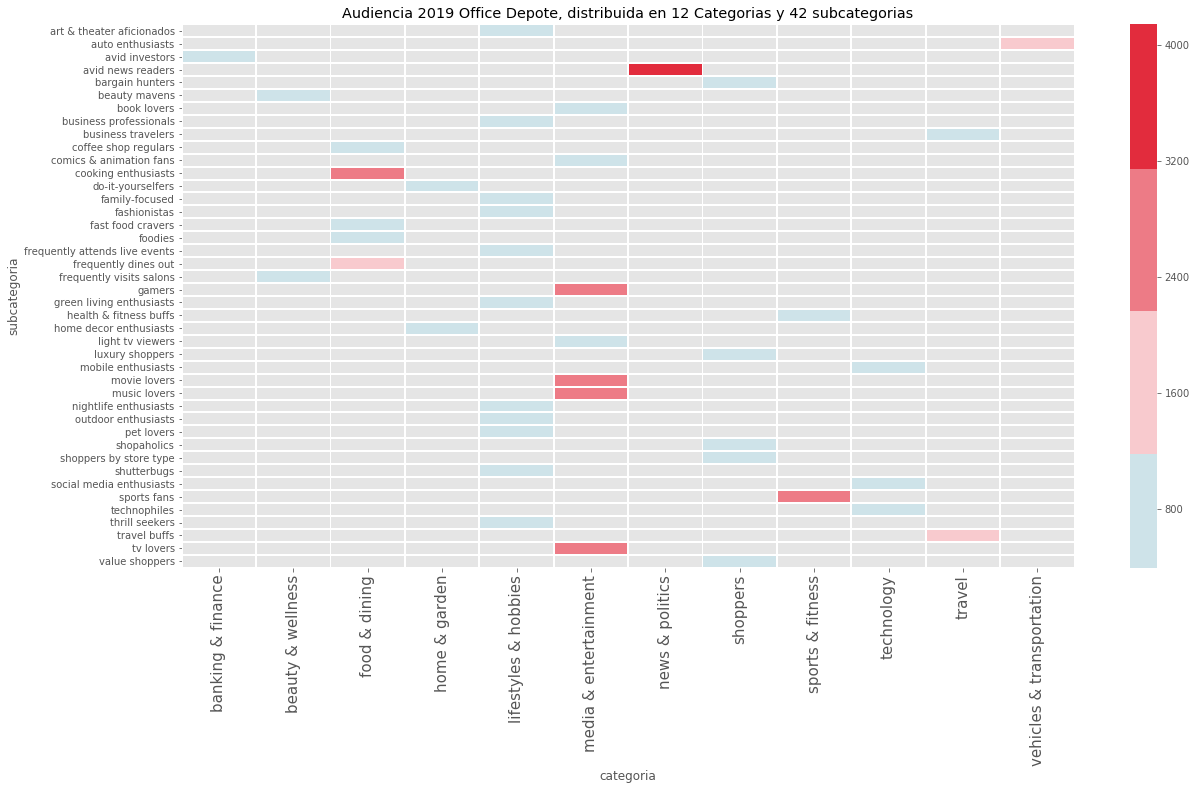

In [10]:
plt.style.use('ggplot')

#Podemos cuidar el tamaño de nuestras gráficas en los cuadernos jupyter
plt.rcParams['figure.figsize'] = [20, 10]

#Filtro
tmp = analytics_audiencia.groupby(['subcategoria','categoria']).size().unstack()

# Define a custom palette
color_palette = sns.diverging_palette(220, 10, s=85)

# Pass palette to plot and set axis ranges
sns.heatmap(tmp,
            cmap = color_palette,
            center = 1175,
            vmin = 393,
            vmax = 4145,
            linewidth=1).set_title('Audiencia 2019 Office Depote, distribuida en 12 Categorias y 42 subcategorias')

plt.yticks(rotation = 0, size = 10)
plt.xticks(rotation = 90, size = 15)
plt.show()

**¿Qué categoría genera mayores Ingresos?**

Top 10 categorias en todo 2019

In [21]:
tmp = analytics_audiencia.groupby(['categoria','subcategoria'],as_index = False).sum().loc[:,['categoria','subcategoria','Ingresos']]

tmp.sort_values('Ingresos', ascending = False).head(10)

,categoria,subcategoria,Ingresos
28,news & politics,avid news readers,483717768
26,media & entertainment,music lovers,356475456
4,food & dining,cooking enthusiasts,275236516
25,media & entertainment,movie lovers,261904475
33,shoppers,value shoppers,240988007
11,lifestyles & hobbies,business professionals,236561897
35,sports & fitness,sports fans,229318820
27,media & entertainment,tv lovers,221445111
40,travel,travel buffs,195495255
30,shoppers,luxury shoppers,191139799


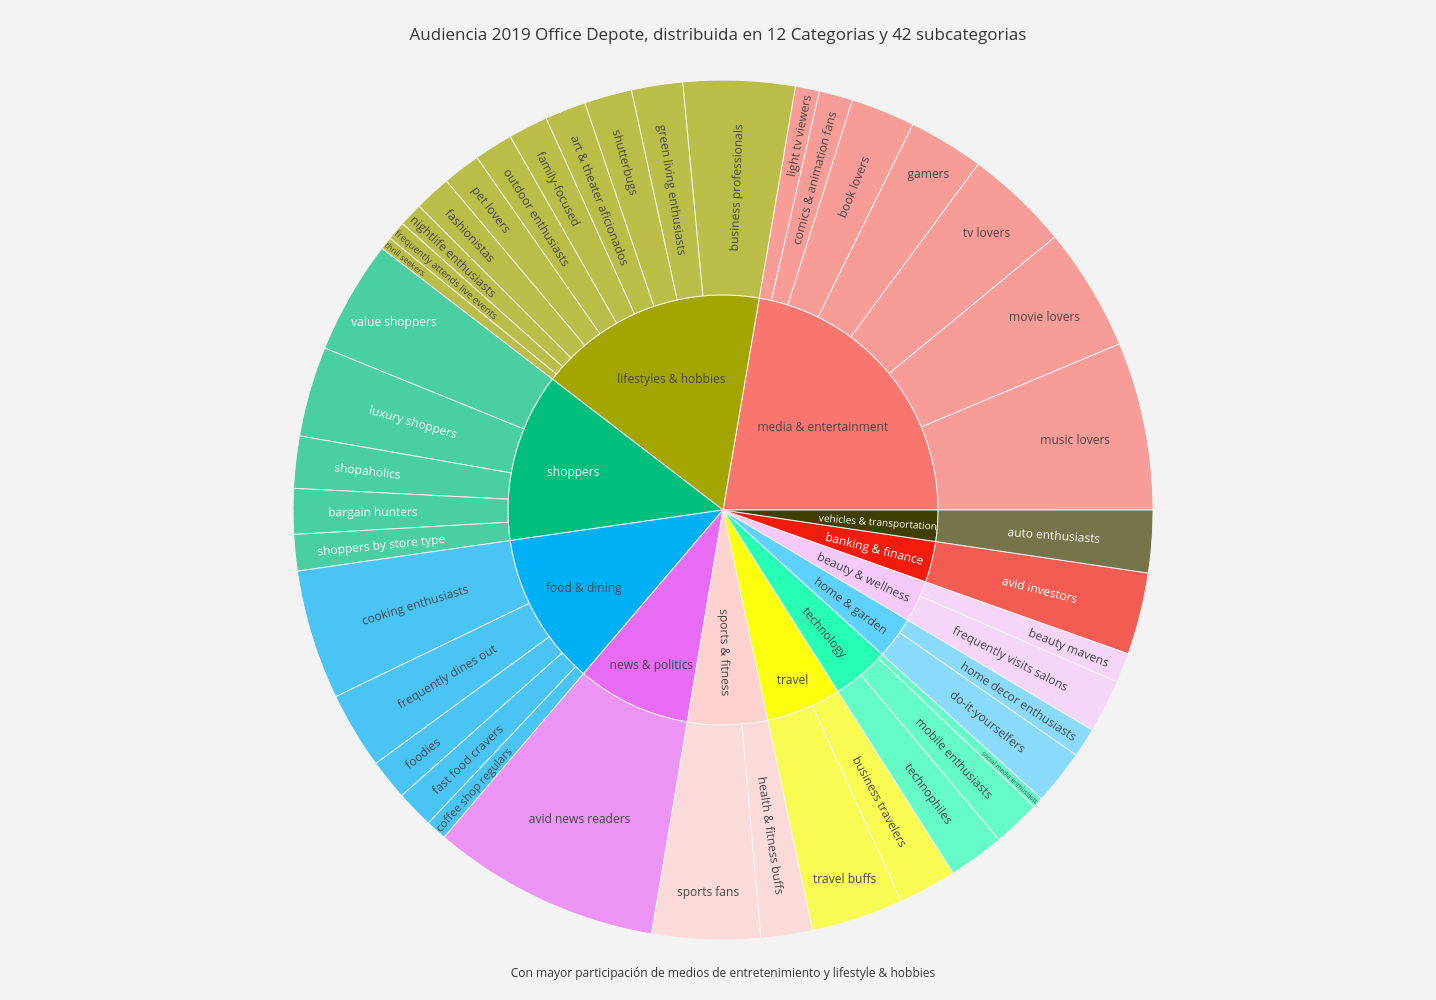

In [111]:
fig = px.sunburst(tmp, path=['categoria', 'subcategoria'], values='Ingresos')

fig.update_layout(legend = {"x":.9,"y":.5},
                  margin=dict(l=20,r=10,b=60,t=80),
                  width=1000,
                  height=1000,
                  title = 'Audiencia 2019 Office Depote, distribuida en 12 Categorias y 42 subcategorias',
                  annotations = [dict(xref='paper',
                                      yref='paper',
                                      x=0.5, y=-0.05,
                                      showarrow=False,
                                      text ='Con mayor participación de medios de entretenimiento y lifestyle & hobbies')],
                  paper_bgcolor='rgb(243, 243, 243)',
                  plot_bgcolor='rgb(243, 243, 243)',
                  template = 'ggplot2')

fig.show()

### Petco

In [43]:
#Union archivos Office Depot
audiencia_afinidad = analytics_funciones.Union_Archivos(Cuenta = ['Petco'], analysis = 'categorias_afinidad', nivel = 'Audiencia')

#Fechas
audiencia_afinidad['fechas'] = [ re.findall( r"\d{8}-\d{8}" ,i) for i in audiencia_afinidad.archivo ]
audiencia_afinidad = analytics_funciones.Formato_Fechas_Analytics(audiencia_afinidad, 'fechas')
audiencia_afinidad['mes'] = pd.DatetimeIndex(audiencia_afinidad['Fecha_inicio']).month.map(str)
audiencia_afinidad = audiencia_afinidad[audiencia_afinidad.Fecha_inicio > '2018-12-01T00:00:00.000000000'] #solo 2019

#Formato categorias
audiencia_afinidad['Categoría de afinidad (cobertura)'] = audiencia_afinidad.loc[:,'Categoría de afinidad (cobertura)'].str.lower()
tmp = audiencia_afinidad['Categoría de afinidad (cobertura)'].str.split("/", 20, expand=True).iloc[:,:2]
audiencia_afinidad['categoria'] = tmp.iloc[:,0]
audiencia_afinidad['subcategoria'] = tmp.iloc[:,1]

**Top 10 categorias en todo 2019**

In [44]:
tmp = analytics_audiencia.groupby(['categoria','subcategoria'],as_index = False).sum().loc[:,['categoria','subcategoria','Ingresos']]

tmp.sort_values('Ingresos', ascending = False).head(10)

,categoria,subcategoria,Ingresos
28,news & politics,avid news readers,16360494
25,media & entertainment,movie lovers,10872116
23,media & entertainment,gamers,9892593
35,sports & fitness,sports fans,9725715
33,shoppers,value shoppers,9526292
26,media & entertainment,music lovers,8908303
4,food & dining,cooking enthusiasts,8677214
27,media & entertainment,tv lovers,7815726
11,lifestyles & hobbies,business professionals,7621913
38,technology,technophiles,7213858


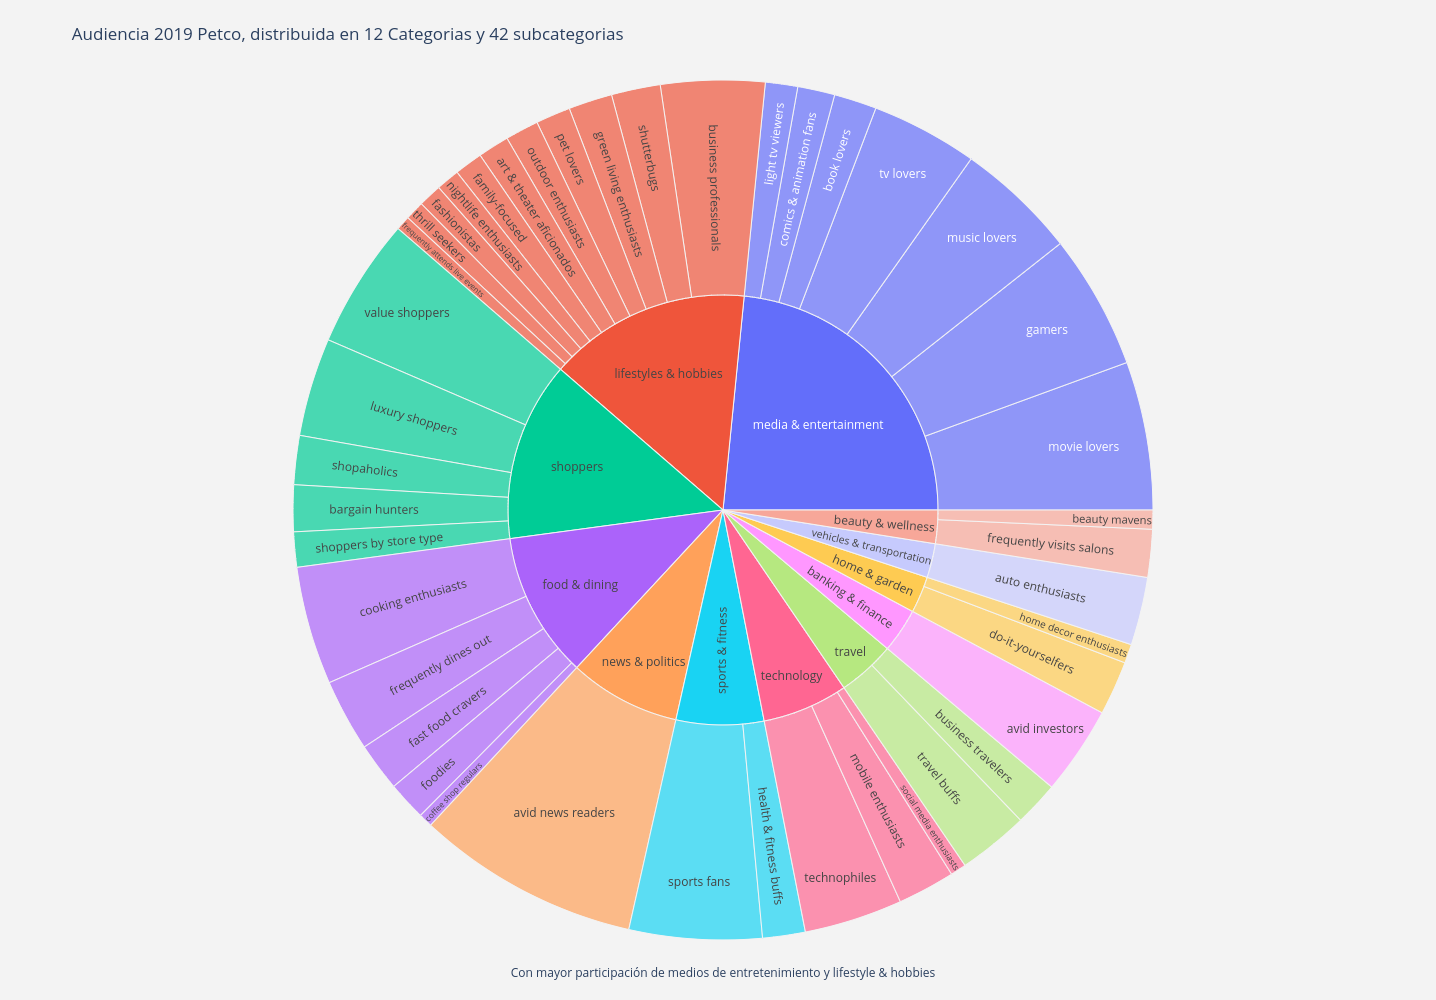

In [45]:
fig = px.sunburst(tmp, path=['categoria', 'subcategoria'], values='Ingresos')

fig.update_layout(legend = {"x":.9,"y":.5},
                  margin=dict(l=20,r=10,b=60,t=80),
                  width=1000,
                  height=1000,
                  title = 'Audiencia 2019 Petco, distribuida en 12 Categorias y 42 subcategorias',
                  annotations = [dict(xref='paper',
                                      yref='paper',
                                      x=0.5, y=-0.05,
                                      showarrow=False,
                                      text ='Con mayor participación de medios de entretenimiento y lifestyle & hobbies')],
                  paper_bgcolor='rgb(243, 243, 243)',
                  plot_bgcolor='rgb(243, 243, 243)')

fig.show()

### RadioShack

In [46]:
#Union archivos Office Depot
audiencia_afinidad = analytics_funciones.Union_Archivos(Cuenta = ['RadioShack'], analysis = 'categorias_afinidad', nivel = 'Audiencia')

#Fechas
audiencia_afinidad['fechas'] = [ re.findall( r"\d{8}-\d{8}" ,i) for i in audiencia_afinidad.archivo ]
audiencia_afinidad = analytics_funciones.Formato_Fechas_Analytics(audiencia_afinidad, 'fechas')
audiencia_afinidad['mes'] = pd.DatetimeIndex(audiencia_afinidad['Fecha_inicio']).month.map(str)
audiencia_afinidad = audiencia_afinidad[audiencia_afinidad.Fecha_inicio > '2018-12-01T00:00:00.000000000'] #solo 2019

#Formato categorias
audiencia_afinidad['Categoría de afinidad (cobertura)'] = audiencia_afinidad.loc[:,'Categoría de afinidad (cobertura)'].str.lower()
tmp = audiencia_afinidad['Categoría de afinidad (cobertura)'].str.split("/", 20, expand=True).iloc[:,:2]
audiencia_afinidad['categoria'] = tmp.iloc[:,0]
audiencia_afinidad['subcategoria'] = tmp.iloc[:,1]

**Top 10 categorias en todo 2019**

In [47]:
tmp = analytics_audiencia.groupby(['categoria','subcategoria'],as_index = False).sum().loc[:,['categoria','subcategoria','Ingresos']]

tmp.sort_values('Ingresos', ascending = False).head(10)

,categoria,subcategoria,Ingresos
28,news & politics,avid news readers,16360494
25,media & entertainment,movie lovers,10872116
23,media & entertainment,gamers,9892593
35,sports & fitness,sports fans,9725715
33,shoppers,value shoppers,9526292
26,media & entertainment,music lovers,8908303
4,food & dining,cooking enthusiasts,8677214
27,media & entertainment,tv lovers,7815726
11,lifestyles & hobbies,business professionals,7621913
38,technology,technophiles,7213858


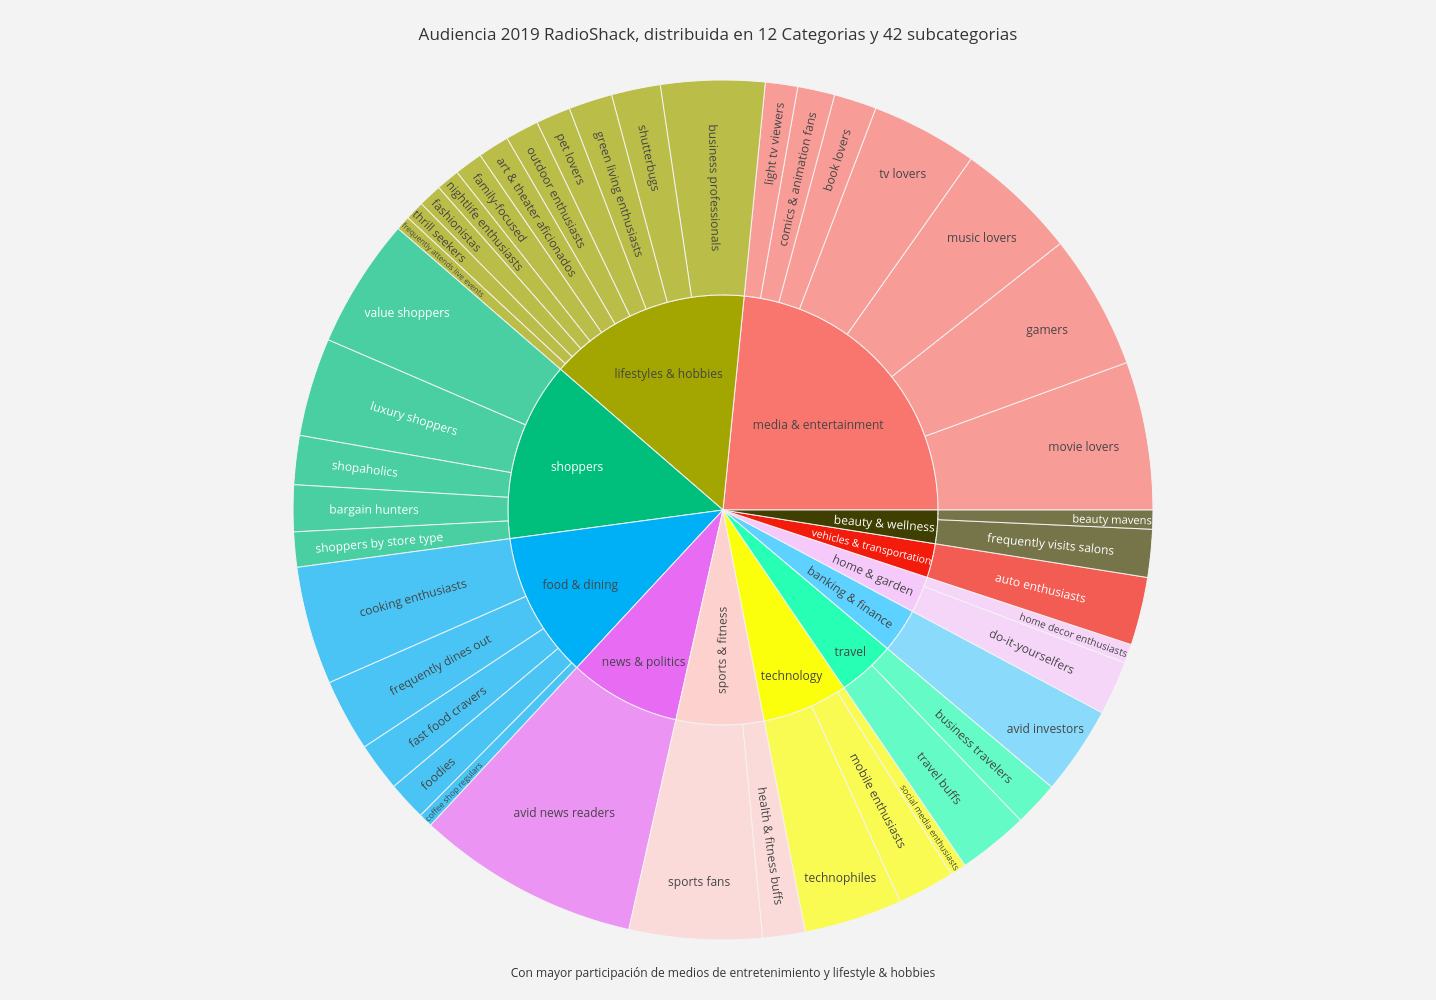

In [48]:
fig = px.sunburst(tmp, path=['categoria', 'subcategoria'], values='Ingresos')

fig.update_layout(legend = {"x":.9,"y":.5},
                  margin=dict(l=20,r=10,b=60,t=80),
                  width=1000,
                  height=1000,
                  title = 'Audiencia 2019 RadioShack, distribuida en 12 Categorias y 42 subcategorias',
                  annotations = [dict(xref='paper',
                                      yref='paper',
                                      x=0.5, y=-0.05,
                                      showarrow=False,
                                      text ='Con mayor participación de medios de entretenimiento y lifestyle & hobbies')],
                  paper_bgcolor='rgb(243, 243, 243)',
                  plot_bgcolor='rgb(243, 243, 243)',
                  template = 'ggplot2')

fig.show()

**Segmento de Mercado**

In [27]:
segmentos_intencion_compra = analytics_funciones.Union_Archivos(Cuenta = ['Office Depot'], analysis = 'segmentos_intencion_compra', nivel = 'Audiencia')
segmentos_intencion_compra.head()

,Duración media de la sesión,Fuente/Medio,Ingresos,Porcentaje de rebote,Páginas/sesión,Segmento de mercado,Sesiones,Tasa de conversión de comercio electrónico,Transacciones,Usuarios,Usuarios nuevos,archivo,cuenta,fechas
0,275,google / cpc,1880568,0,10,Consumer Electronics/Mobile Phones,112871,0,956,64963,37485,/home/carlos/Dropbox/Históricos GG/Históricos ...,Office Depot,[20190601-20190630]
1,265,google / organic,1812412,0,9,Consumer Electronics/Mobile Phones,92499,0,676,61428,36449,/home/carlos/Dropbox/Históricos GG/Históricos ...,Office Depot,[20190601-20190630]
2,283,google / cpc,2234120,0,11,Travel/Trips by Destination/Trips to North Ame...,86429,0,977,54903,32518,/home/carlos/Dropbox/Históricos GG/Históricos ...,Office Depot,[20190601-20190630]
3,284,google / organic,1647701,0,10,Travel/Trips by Destination/Trips to North Ame...,66115,0,571,47396,28345,/home/carlos/Dropbox/Históricos GG/Históricos ...,Office Depot,[20190601-20190630]
4,292,google / cpc,2073422,0,11,Travel/Hotels & Accommodations,71720,0,814,45140,26871,/home/carlos/Dropbox/Históricos GG/Históricos ...,Office Depot,[20190601-20190630]


In [2]:
import requests

#html = requests.get("https://www.bestbuy.com.mx/c/ofertas-en-computadoras-y-mas/1002222?promo_id=w46_19_hm&promo_name=w46_19_hm_bnc_cop_computadoras46&promo_creative=bnc_cop&promo_position=slot2")